In [1]:
%pip install numpy pandas matplotlib scikit-learn


[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# Introduction to Anomaly Detection
Anomaly Detection is used to identify rare items, events, or observations that differ significantly from the majority of the data.


## CASE STUDY:  Credit Card Fraud

### Background
FICO (and American Express) both use anomaly detection to monitor transactions. Anomalous transactions are flagged for manual review to prevent fraud.

### Data
The dataset includes transaction amount, location, and frequency of transactions.

### Solution
Isolation Forest and similar techniques are used to detect transactions that deviate significantly from a user's normal behavior.

### Results
The system detects over 90% of fraudulent transactions, preventing losses and reducing risk for the bank.

## Why Anomaly Detection Matters
Anomalies can represent critical events:
- **Fraud Detection**: Anomalous transactions could be fraudulent.
- **Network Security**: Unusual activity may indicate an attack.
- **Manufacturing**: Equipment failures may be detected through abnormal sensor readings.

# Types of Anomalies
1. **Point Anomalies**: One data point that is far from others (e.g., a high-value credit transaction).
2. **Contextual Anomalies**: Points that are only anomalous in a given context (e.g., a spike in temperature that's unusual for a certain season).
3. **Collective Anomalies**: A set of data points that, together, indicate abnormal behavior (e.g., repeated failed logins).

# Popular Anomaly Detection Techniques

1. **Machine Learning Models**: Use algorithms like Isolation Forest, One-Class SVM, and Autoencoders.
2. **Statistical Methods**: Use statistics to identify outliers (e.g., Z-score, IQR).3. **Distance-Based Methods**: Identify outliers based on distance metrics (e.g., k-NN).
4. **Density-Based Methods**: Detect anomalies based on local density (e.g., DBSCAN).

---

# Anomaly Detection with Isolation Forest
Isolation Forest is an unsupervised learning algorithm that isolates anomalies by randomly partitioning the larger (and high-dimensionl) datasets into linear groupings. It's easy to use with numeric data, and memory efficient, but may trip on false-positives.

It creates multiple isolation trees (forest)
, averages the path lengths to isolate points.
Shorter paths = more likely to be anomalies

## How Isolation Forest Works
- Randomly selects a feature
- Randomly selects a split point
- Recursively partitions data until each point is isolated
- Anomalies require fewer splits to isolate
Normal points (in dense regions) require more splits



# Simulating Data for Anomaly Detection
Let's create a dataset with a few anomalous points.

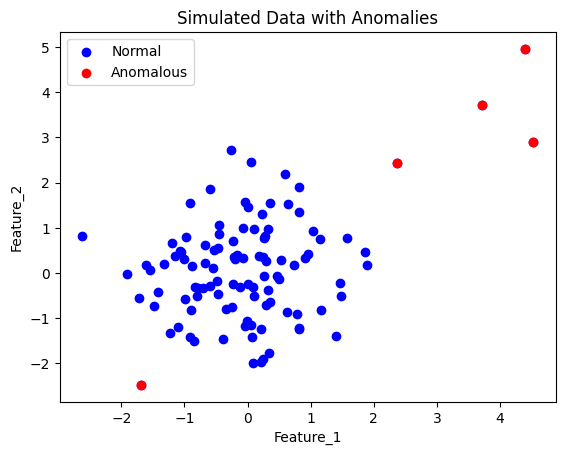

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate normal data
np.random.seed(42)
data_normal = np.random.normal(loc=0, scale=1, size=(100, 2))

# Add anomalies
data_anomalous = np.random.uniform(low=-6, high=6, size=(5, 2))

# Combine into a DataFrame
data = np.vstack([data_normal, data_anomalous])
df = pd.DataFrame(data, columns=['Feature_1', 'Feature_2'])

# Visualize data
plt.scatter(df['Feature_1'], df['Feature_2'], color='blue', label='Normal')
plt.scatter(data_anomalous[:, 0], data_anomalous[:, 1], color='red', label='Anomalous')
plt.xlabel('Feature_1')
plt.ylabel('Feature_2')
plt.legend()
plt.title("Simulated Data with Anomalies")
plt.show()

# Applying Isolation Forest for Anomaly Detection
Let's use Isolation Forest to identify the anomalies in our data.

In [3]:
from sklearn.ensemble import IsolationForest

# Initialize Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df['Anomaly_Score'] = iso_forest.fit_predict(df[['Feature_1', 'Feature_2']])

# Separate the results
normal = df[df['Anomaly_Score'] == 1]
anomalies = df[df['Anomaly_Score'] == -1]

# Display number of anomalies detected
print("Number of anomalies detected:", len(anomalies))

Number of anomalies detected: 6


# Visualizing the Results
Let's plot the data to see which points were detected as anomalies.

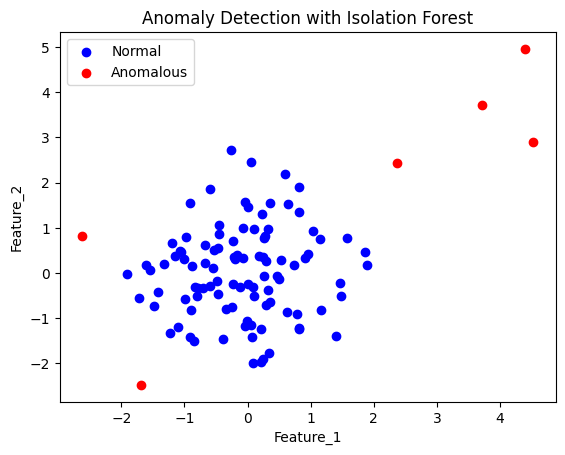

In [4]:
plt.scatter(normal['Feature_1'], normal['Feature_2'], color='blue', label='Normal')
plt.scatter(anomalies['Feature_1'], anomalies['Feature_2'], color='red', label='Anomalous')
plt.xlabel('Feature_1')
plt.ylabel('Feature_2')
plt.legend()
plt.title("Anomaly Detection with Isolation Forest")
plt.show()

# Evaluating Model Performance
In real-world cases, we would evaluate based on precision, recall, and F1 score for anomaly detection. However, in an unsupervised setting, this is challenging without labeled data.

#### Precision:
When we predict anomaly, how often are we right?

`True Pos. / (True Pos. + False Pos.)`

#### Recall:
What proportion of actual anomalies did we catch?

`True Pos. / (True Pos. + False Neg.)`

#### Accuracy:
What % of all predictions are right?

`(TP + TN) / (TP + TN + FP + FN)`


#### F1 Score:

>  Combines Precision and Recall as one metric:

>   `F1 = 2 * (Prec. * Recall) / (Prec. + Recall)`

>  Range: 0 (worst) to 1 (best)
  Balanced measure between false positives and false negatives



## Tips for Real-World Evaluation
- **Labeling Small Sample**: Label a small sample of data for evaluation.
- **Manual Inspection**: Manually review flagged anomalies.
- **Compare with Baseline**: Use historical anomaly data as a baseline.

# Best Practices for Anomaly Detection
- **Use Domain Knowledge**: Understand the specific context to refine your anomaly detection approach.
- **Optimize Threshold**: Adjust the anomaly detection threshold to balance sensitivity and specificity.
- **Combine with Other Techniques**: Use multiple techniques (e.g., statistical and machine learning-based methods) for more reliable detection.
- **Monitor Regularly**: Anomaly patterns may change over time, so periodic retraining is beneficial.

